In [1]:
# coding: utf-8
import numpy as np
import os
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot as plt
import pickle
disp_real_dir='./data/disp_pg_real/'
disp_sws_dir ='./data/disp_sws/'
disp_cnn_dir ='./data/disp_cnn_usa_tibet/'
vs_sws_dir = './data/vs_sws_China/'
vs_cnn_dir ='./data/vs_cnn_usa_tibet/'
allfiles=os.listdir((disp_cnn_dir))
count = 0
cnn_ph_chi=[]
cnn_gr_chi=[]
sws_ph_chi = []
sws_gr_chi = []
cnn_ph_gr_chi = []
sws_ph_gr_chi = []
font={
    'size':18  
}
region = [0,5,150,0]
os.system("rm -rf Figs_usa_tibet && mkdir Figs_usa_tibet")

def fun_mean_square(v):
    v2 = v*v
    chi_square =np.sqrt(np.sum(v2)/len(v))
    return chi_square 
lon_lat_save=['100_36','120_31','115_25','92_43','93_33','108_38','106_30','124_46','117_34'];
with open('./data/select.point','r') as f:
    chinaNames=f.read().splitlines()
# for fi in allfiles:
for fi in chinaNames:
    temp=fi.split()
    lon,lat=fi.split()
    fi = lat+"_"+lon+'.txt'
    
    a=os.path.exists(disp_cnn_dir+fi)
    b=os.path.exists(disp_real_dir+fi)
    c=os.path.exists(disp_sws_dir+fi)
    if a and b and c:
        count =count+1
        print('count ',count,fi)
        lat,lon=fi.split('.txt')[0].split('_')
        lon_lat_select = '_'.join([lon.split('.')[0],lat.split('.')[0]])
        lat=float(lat);lon=float(lon)
        cnn_disp = np.loadtxt(disp_cnn_dir+fi)
        real_disp = np.loadtxt(disp_real_dir+fi)
        sws_disp = np.loadtxt(disp_sws_dir+fi)
        vs_cnn = np.loadtxt(vs_cnn_dir+fi)
        vs_sws = np.loadtxt(vs_sws_dir+fi)
        periods = real_disp[:,0]
        ph_disp = real_disp[:,1];ph_un = real_disp[:,2]
        gr_disp = real_disp[:,3];gr_un = real_disp[:,4]
        # cnn chi-square
        chi_dv_ph=(cnn_disp[:,1]-ph_disp)/ph_un
        rms = fun_mean_square(chi_dv_ph)
        cnn_ph_chi.append([lon,lat,rms])
        
        chi_dv_gr=(cnn_disp[:,2]-gr_disp)/gr_un
        rms = fun_mean_square(chi_dv_gr)
        cnn_gr_chi.append([lon,lat,rms])
        # sws chi-square
        chi_dv_ph=(sws_disp[:,1]-ph_disp)/ph_un
        rms = fun_mean_square(chi_dv_ph)
        sws_ph_chi.append([lon,lat,rms])
        chi_dv_gr=(sws_disp[:,2]-gr_disp)/gr_un
        rms = fun_mean_square(chi_dv_gr)
        sws_gr_chi.append([lon,lat,rms])
        
        #cnn gr_ph stack
        ph_gr_cnn  = np.hstack((cnn_disp[:,1],cnn_disp[:,2]))
        ph_gr_disp = np.hstack((ph_disp,gr_disp))
        ph_gr_un   = np.hstack((ph_un,gr_un))
        chi_dv_ph_gr=(ph_gr_disp-ph_gr_cnn)/ph_gr_un
        rms = fun_mean_square(chi_dv_ph_gr)
        cnn_ph_gr_chi.append([lon,lat,rms])
   
    
        #sws gr_ph stack
        ph_gr_sws  = np.hstack((sws_disp[:,1],sws_disp[:,2]))
        ph_gr_disp = np.hstack((ph_disp,gr_disp))
        ph_gr_un   = np.hstack((ph_un,gr_un))
        chi_dv_ph_gr=(ph_gr_disp-ph_gr_sws)/ph_gr_un
        rms = fun_mean_square(chi_dv_ph_gr)
        sws_ph_gr_chi.append([lon,lat,rms])
        if lon_lat_select in lon_lat_save : #count % 50 ==0:
            fig,axes=plt.subplots(1,3,figsize=(15,5))
            ax = axes[0]
            ax.errorbar(periods[:],ph_disp[:],yerr=ph_un,fmt='-ro',linewidth=2,label="REAL", capsize=4 )
            ax.plot(periods[:],cnn_disp[:,1],"-g",linewidth=2,label="CNN")
            ax.plot(periods[:],sws_disp[:,1],"-b",linewidth=2,label="Shen et al. (2016)")
            ax.set_title("Phase velocity",fontsize=font['size'])
            ax.set_xlabel("T(s)",fontsize=font['size'])
            ax.set_ylabel("Velocity(km/s)",fontsize=font['size'])
            ax.tick_params(axis="both",labelsize=font['size'])
            ax.legend(loc="lower right",fontsize = font["size"]-2)
            
            ax = axes[1]
            ax.errorbar(periods[:],gr_disp[:],yerr=gr_un,fmt="-or",linewidth=2,label="REAL", capsize=4 )
            ax.plot(cnn_disp[:,0],cnn_disp[:,2],'-g',linewidth=2,label="CNN")
            ax.plot(periods[:],sws_disp[:,2],"-b",linewidth=2,label="Shen et al. (2016)")

            ax.set_title("Group velocity",fontsize=font['size'])
            ax.set_xlabel("T(s)",fontsize=font['size'])
            ax.set_ylabel("Velocity(km/s)",fontsize=font['size'])
            ax.tick_params(axis="both",labelsize=font['size'])
            ax.legend(loc="lower right",fontsize=font["size"]-2)
            ax=axes[2]
            ax.plot(vs_cnn[:,1],vs_cnn[:,0],"-g",linewidth=2,label="CNN")
            ax.plot(vs_sws[:,1],vs_sws[:,0],"-b",linewidth=2,label="Shen et al. (2016)")
            ax.axis(region)
            ax.set_ylabel("Depth(km)",fontsize=font['size'])
            ax.set_xlabel("Vs(km/s)",fontsize=font['size'])
            ax.set_title("1-D velocity model",fontsize=font['size'])
            ax.tick_params(axis="both",labelsize=font['size'])
            ax.legend(loc = "lower left",fontsize=font["size"]-2)
            plt.tight_layout()
            plt.savefig("./Figs_usa_tibet/"+fi+".png",dpi=300,bbox_inches="tight")
#             plt.pause(0.1)
            fig.clf()
with open("rms_chisquare_fixedUncertainty_0.1_usa_tibet.pkl","wb") as fb:
    pickle.dump(cnn_ph_chi,fb)
    pickle.dump(cnn_gr_chi,fb)
    pickle.dump(cnn_ph_gr_chi,fb)
    pickle.dump(sws_ph_chi,fb)
    pickle.dump(sws_gr_chi,fb)
    pickle.dump(sws_ph_gr_chi,fb)

count  1 20.00_110.50.txt
count  2 20.50_110.00.txt
count  3 20.50_110.50.txt
count  4 21.00_110.00.txt
count  5 21.00_110.50.txt
count  6 21.50_109.50.txt
count  7 21.50_110.00.txt
count  8 21.50_110.50.txt
count  9 21.50_111.00.txt
count  10 22.00_101.50.txt
count  11 22.00_107.00.txt
count  12 22.00_107.50.txt
count  13 22.00_108.00.txt
count  14 22.00_108.50.txt
count  15 22.00_109.00.txt
count  16 22.00_109.50.txt
count  17 22.00_110.00.txt
count  18 22.00_110.50.txt
count  19 22.00_111.00.txt
count  20 22.00_111.50.txt
count  21 22.00_112.00.txt
count  22 22.00_112.50.txt
count  23 22.00_113.00.txt
count  24 22.50_100.00.txt
count  25 22.50_100.50.txt
count  26 22.50_101.00.txt
count  27 22.50_101.50.txt
count  28 22.50_102.00.txt
count  29 22.50_103.00.txt
count  30 22.50_107.00.txt
count  31 22.50_107.50.txt
count  32 22.50_108.00.txt
count  33 22.50_108.50.txt
count  34 22.50_109.00.txt
count  35 22.50_109.50.txt
count  36 22.50_110.00.txt
count  37 22.50_110.50.txt
count  38 

/home/hj/Soft/Anaconda3.4/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


count  1497 36.00_100.50.txt
count  1498 36.00_101.00.txt
count  1499 36.00_101.50.txt
count  1500 36.00_102.00.txt
count  1501 36.00_102.50.txt
count  1502 36.00_103.00.txt
count  1503 36.00_103.50.txt
count  1504 36.00_104.00.txt
count  1505 36.00_104.50.txt
count  1506 36.00_105.00.txt
count  1507 36.00_105.50.txt
count  1508 36.00_106.00.txt
count  1509 36.00_106.50.txt
count  1510 36.00_107.00.txt
count  1511 36.00_107.50.txt
count  1512 36.00_108.00.txt
count  1513 36.00_108.50.txt
count  1514 36.00_109.00.txt
count  1515 36.00_109.50.txt
count  1516 36.00_110.00.txt
count  1517 36.00_110.50.txt
count  1518 36.00_111.00.txt
count  1519 36.00_111.50.txt
count  1520 36.00_112.00.txt
count  1521 36.00_112.50.txt
count  1522 36.00_113.00.txt
count  1523 36.00_113.50.txt
count  1524 36.00_114.00.txt
count  1525 36.00_114.50.txt
count  1526 36.00_115.00.txt
count  1527 36.00_115.50.txt
count  1528 36.00_116.00.txt
count  1529 36.00_116.50.txt
count  1530 36.00_117.00.txt
count  1531 36

(3260, 3)
(3260, 3)
CNN: ph/gr mean misfit 2.32669 / 1.43055
SWS: ph/gr mean misfit 2.30557 / 1.30547


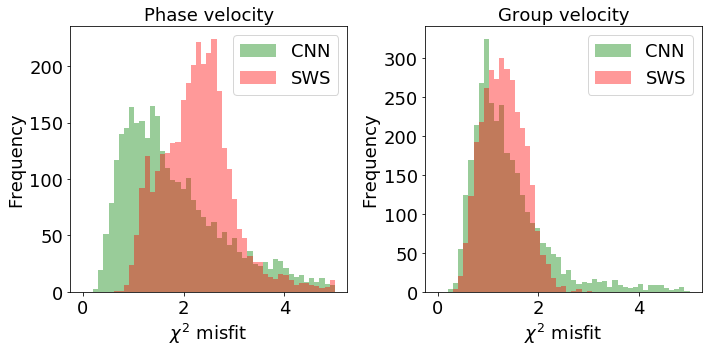

In [4]:
# plot final rms
import matplotlib.pyplot as plt
import pickle,pprint
import numpy as np
with open("rms_chisquare_fixedUncertainty_0.1_usa_tibet.pkl","rb") as fb:
    cnn_ph_chi=np.array(pickle.load(fb))
    cnn_gr_chi=np.array(pickle.load(fb))
    cnn_ph_gr_chi = np.array(pickle.load(fb))
    sws_ph_chi=np.array(pickle.load(fb))
    sws_gr_chi=np.array(pickle.load(fb))
    sws_ph_gr_chi = np.array(pickle.load(fb))
print(cnn_gr_chi.shape)
print(cnn_ph_chi.shape)
print("CNN: ph/gr mean misfit {:.5f} / {:.5f}".format(np.mean(cnn_ph_chi[:,-1]),np.mean(cnn_gr_chi[:,-1])))
 
print("SWS: ph/gr mean misfit {:.5f} / {:.5f}".format(np.mean(sws_ph_chi[:,-1]),np.mean(sws_gr_chi[:,-1])))
 
font = {
        'weight': 'normal',
        'size': 18,
        }
bins= np.linspace(0, 5, 50)    
fig,axes=plt.subplots(1,2,figsize=(10,5))

ax = axes[0]
ax.hist(cnn_ph_chi[:,-1],bins,color="green",alpha=0.4, label='CNN')
ax.hist(sws_ph_chi[:,-1],bins,color="red",alpha=0.4, label='SWS')
ax.set_title("Phase velocity",fontdict=font)
ax.set_xlabel("$\chi^2$ misfit ",fontdict=font)
ax.set_ylabel("Frequency",fontdict=font)
ax.tick_params(axis="both",labelsize=font['size'])
ax.legend(loc = "upper right",fontsize=font['size']) 


ax = axes[1]
ax.hist(cnn_gr_chi[:,-1],bins,color="green",alpha=0.4, label='CNN')
ax.hist(sws_gr_chi[:,-1],bins,color="red",alpha=0.4, label='SWS') 
ax.set_title("Group velocity",fontdict=font)
ax.set_xlabel("$\chi^2$ misfit ",fontdict=font)
ax.set_ylabel("Frequency",fontdict=font)
ax.legend(loc = "upper right",fontsize=font['size']) 
ax.tick_params(axis="both",labelsize=font['size'])
plt.tight_layout()
plt.savefig("chi-square_usa_tibet.png",dpi=300,bbox_inches='tight')
plt.pause(1)

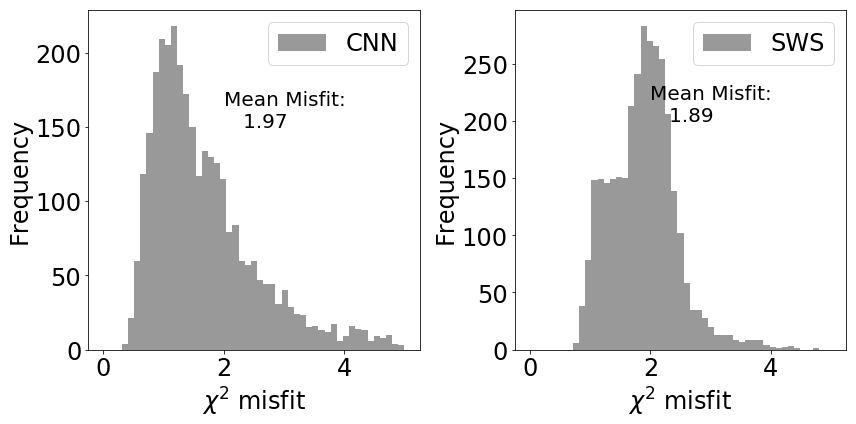

In [5]:
# plot final rms
import matplotlib.pyplot as plt
import pickle,pprint
import numpy as np
with open("rms_chisquare_fixedUncertainty_0.1_usa_tibet.pkl","rb") as fb:
    cnn_gr_chi=np.array(pickle.load(fb))
    cnn_ph_chi=np.array(pickle.load(fb))
    cnn_ph_gr_chi = np.array(pickle.load(fb))
    sws_gr_chi=np.array(pickle.load(fb))
    sws_ph_chi=np.array(pickle.load(fb))
    sws_ph_gr_chi = np.array(pickle.load(fb))
font = {
        'weight': 'normal',
        'size': 24,
        }
bins= np.linspace(0,5, 50)    
fig,axes=plt.subplots(1,2,figsize=(12,6))
ax = axes[0] 
ax.hist(cnn_ph_gr_chi[:,-1],bins,color="grey",alpha=0.8, label='CNN')
# ax.set_title("Misfit",fontdict=font)
ax.text(2.,150,"Mean Misfit:\n   {:.2f}".format(np.mean(cnn_ph_gr_chi[:,-1])),fontsize=font["size"]-4)
ax.set_xlabel("$\chi^2$ misfit ",fontdict=font)
ax.set_ylabel("Frequency",fontdict=font)
ax.legend(loc = "upper right",fontsize=font['size']) 
ax.tick_params(axis="both",labelsize=font['size'])


ax = axes[1] 
ax.hist(sws_ph_gr_chi[:,-1],bins,color="grey",alpha=0.8, label='SWS')
ax.text(2.,200,"Mean Misfit:\n   {:.2f}".format(np.mean(sws_ph_gr_chi[:,-1])),fontsize=font["size"]-4)
# ax.set_title("Misfit",fontdict=font)
ax.set_xlabel("$\chi^2$ misfit ",fontdict=font)
ax.set_ylabel("Frequency",fontdict=font)
ax.legend(loc = "upper right",fontsize=font['size']) 
ax.tick_params(axis="both",labelsize=font['size'])
plt.tight_layout()
plt.savefig("chi-square_ph_gr_usa_tibet.png",dpi=300,bbox_inches='tight')
plt.pause(1)